In [457]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [458]:
complete_data = pd.read_csv("../data/curated/complete_data.csv")
data = complete_data[['Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]
data['Count_School'] = data['Count_School'].fillna(value = 0)
data['Count_Station'] = data['Count_Station'].fillna(value = 0)
data = data.dropna(axis=0)

Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [292]:
y = data['Weekly Rental Price']
x = data[['Baths', 'Population', 'Count_School', 'Count_Station', 'Bedrooms']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [293]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [294]:
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

In [295]:
model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

In [296]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
863/863 [==============================] - 33s 33ms/step - loss: 9.8738 - msle: 8.9780 - val_loss: 3.1862 - val_msle: 1.8042
Epoch 2/100
863/863 [==============================] - 26s 30ms/step - loss: 2.5398 - msle: 1.1734 - val_loss: 2.1372 - val_msle: 0.8735
Epoch 3/100
863/863 [==============================] - 27s 31ms/step - loss: 1.8643 - msle: 0.7230 - val_loss: 1.6736 - val_msle: 0.6445
Epoch 4/100
863/863 [==============================] - 25s 29ms/step - loss: 1.4837 - msle: 0.5360 - val_loss: 1.3626 - val_msle: 0.4903
Epoch 5/100
863/863 [==============================] - 29s 34ms/step - loss: 1.2486 - msle: 0.4403 - val_loss: 1.1866 - val_msle: 0.4369
Epoch 6/100
863/863 [==============================] - 18s 21ms/step - loss: 1.1031 - msle: 0.3937 - val_loss: 1.0623 - val_msle: 0.3911
Epoch 7/100
863/863 [==============================] - 12s 14ms/step - loss: 0.9919 - msle: 0.3646 - val_loss: 0.9611 - val_msle: 0.3778
Epoch 8/100
863/863 [====================

In [297]:
model.evaluate(X_test, Y_test)[1]

185/185 [==============================] - 5s 27ms/step - loss: 0.2674 - msle: 0.2378


0.23776564002037048

In [298]:
import matplotlib.pyplot as plt

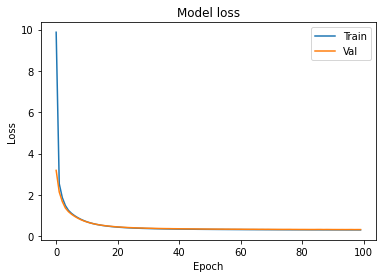

In [299]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

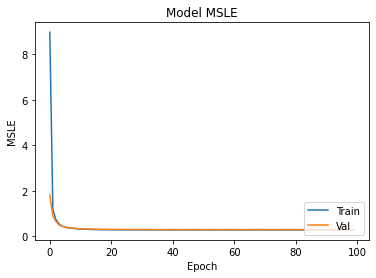

In [300]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [441]:
import pandas as pd
pop = pd.read_csv("../data/curated/predicted_population.csv")

In [442]:
post_data = complete_data[['Postcode', 'Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]

In [443]:
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

In [444]:
pop_2023 = pd.merge(pop_2023, post_data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 =pop_2023.drop(labels=['Postcode'],axis=1)
pop_2023 = pop_2023[['2023', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [446]:
pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis=0)
pred_2023 = model.predict(pop_2023)
data.insert(6, 'Pred_2023', pred_2023)

In [461]:
pop_2024 = pd.merge(pop_2024, post_data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 =pop_2024.drop(labels=['Postcode'],axis=1)
pop_2024 = pop_2024[['2024', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [462]:
pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pred_2024 = model.predict(pop_2024)
data.insert(7, 'Pred_2024', pred_2024)

1233/1233 [==============================] - 27s 22ms/step


In [463]:
data

,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price,Pred_2023,Pred_2024
0,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137
1,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137
2,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137
3,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137
4,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137
...,...,...,...,...,...,...,...,...
42824,1,36100.0,0.0,0.0,2,420.0,766.261414,776.152588
42825,1,36100.0,0.0,0.0,2,370.0,766.261414,776.152588
42826,1,36100.0,0.0,0.0,2,370.0,766.261414,776.152588
42827,2,36100.0,0.0,0.0,3,475.0,766.283020,776.174194


In [464]:
pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 =pop_2025.drop(labels=['Postcode'],axis=1)
pop_2025 = pop_2025[['2025', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [466]:
pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pred_2025 = model.predict(pop_2025)
data.insert(8, 'Pred_2025', pred_2025)

1233/1233 [==============================] - 16s 13ms/step


In [467]:
data

,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025
0,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137,744.439636
1,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137,744.439636
2,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137,744.439636
3,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137,744.439636
4,0,29606.0,4.0,45.0,0,60.0,739.959167,742.403137,744.439636
...,...,...,...,...,...,...,...,...,...
42824,1,36100.0,0.0,0.0,2,420.0,766.261414,776.152588,786.481079
42825,1,36100.0,0.0,0.0,2,370.0,766.261414,776.152588,786.481079
42826,1,36100.0,0.0,0.0,2,370.0,766.261414,776.152588,786.481079
42827,2,36100.0,0.0,0.0,3,475.0,766.283020,776.174194,786.502747
